## 🌊Project III | APIs, Feature Engineering & Machine Learning (Linear Regression Modelling)🚱

### Water consumption in Catalonia by region

Public Data retrieved from the Spanish Government API about water consumption by region in Catalonia, distinguishing between domestic consumption and that from own sources and for economic activities. The data is compiled from the declarations to the Catalan Water Agency of the supplying entities, industrial users and other economic activities. The consumption is calculated based on the invoiced consumption of the water tariff, it does not include the minimum invoices of the tariff.

In [703]:
#Importing libraries
import pandas as pd
from pandas import json_normalize 

import requests 
import json
import os
from dotenv import load_dotenv #conda install -c conda-forge python-dotenv

import time

In [704]:
#Importing url from the API "https://datos.gob.es/en/apidata"
url = "https://analisi.transparenciacatalunya.cat/api/views/2gws-ubmt/rows.json?accessType=DOWNLOAD"


In [705]:
#Checking the status
response = requests.get(url)
response.status_code

200

In [706]:
#Saving the json data into a variable
data = response.json()

In [707]:
#Checking for metadata 
response.json()['meta']['view']

{'id': '2gws-ubmt',
 'name': 'Consum d’aigua a Catalunya per comarques',
 'assetType': 'dataset',
 'attribution': 'Agència Catalana de l’Aigua (ACA)',
 'attributionLink': 'https://administraciodigital.gencat.cat/ca/dades/dades-obertes/informacio-practica/llicencies/',
 'averageRating': 0,
 'category': 'Medi Ambient',
 'createdAt': 1601553060,
 'description': 'El data set recull el consum d’aigua per comarques, distingint entre el consum domèstic i el de fonts pròpies i per activitats econòmiques. Les dades són elaborades a partir de les declaracions a l’Agència Catalana de l’Aigua de les entitats subministradores, dels usuaris industrials i d’altres activitats econòmiques.  El consum es calcula a partir del consum facturat del cànon de l’aigua, no inclou els mínims de facturació del cànon.',
 'displayType': 'table',
 'downloadCount': 2359,
 'hideFromCatalog': False,
 'hideFromDataJson': False,
 'licenseId': 'SEE_TERMS_OF_USE',
 'locked': False,
 'newBackend': True,
 'numberOfComments':

Metadata water consumption dataframe:

- Any: Invoicing year of consumption to which the data refers

- Codi comarca: Code of the region

- Comarca: Region to which the data refer

- Població: Number of inhabitants of the county based on data from the Municipal Register of Inhabitants as of January 1

- Domestic xarxa: Volume consumed billed to households connected to the water supply network. Measured in cubic meters

- Activitats econòmiques i fonts pròpies: Volume consumed and invoiced to industrial and service uses connected to the water supply network and to all users of own sources. Measured in cubic meters

- Total: Sum of the volume of Domestic network and Economic activities and own sources. Measured in cubic meters

- Consum domèstic per càpita: Domestic consumption of the network per person per day. It is calculated as follows: (Domestic network*1000)/(Population*365). Measured in liters/person/day'

In [708]:
#The data is organized into an array of arrays, where each inner array represents a row of data.
#I will retrieve the column headers. Each object in the columns array has information about a column (name, data type, and description)
columnas = [column['name'] for column in data['meta']['view']['columns']]

In [709]:
#Same goes for the rows, the inner arrays corresponsd to the data values for the columns retrieved above:
filas = data['data']

In [710]:
#Setting the raw dataframe:
df = pd.DataFrame(filas, columns=columnas)

In [711]:
df

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,Any,Codi comarca,Comarca,Població,Domèstic xarxa,Activitats econòmiques i fonts pròpies,Total,Consum domèstic per càpita
0,row-ytd2.j8w4-s458,00000000-0000-0000-2389-41C805B9EAAD,0,1686892360,None,1686892360,None,{ },2022,1,"ALT CAMP, L'",45540,1685688,3040038,4725726,101.41
1,row-wyqk-qpxk_jczr,00000000-0000-0000-CB5E-8C3E104A7F58,0,1686892360,None,1686892360,None,{ },2022,2,"ALT EMPORDÀ, L'",144926,8593650,4831755,13425405,162.46
2,row-wnzu.wt7j-f5eh,00000000-0000-0000-AE2F-59C0592C2198,0,1686892360,None,1686892360,None,{ },2022,3,"ALT PENEDÈS, L'",110929,4533398,3262053,7795451,111.97
3,row-7rzc-wh8v_5nmg,00000000-0000-0000-6FD3-34E95785096B,0,1686892360,None,1686892360,None,{ },2022,4,"ALT URGELL, L'",20482,1016456,1467236,2483692,135.96
4,row-95mh.ncbn~q3s8,00000000-0000-0000-C336-DCAADB48F18D,0,1686892360,None,1686892360,None,{ },2022,5,"ALTA RIBAGORÇA, L'",3958,469071,271619,740690,324.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,row-8pka_bhn8-7ugn,00000000-0000-0000-DE02-C0734FF0E169,0,1686892360,None,1686892360,None,{ },2012,37,TERRA ALTA,12713,441824,225143,666967,95.22
455,row-dtxw_yw9e_m4q8,00000000-0000-0000-DAD1-A72D6BDFD7BB,0,1686892360,None,1686892360,None,{ },2012,38,"URGELL, L'",36975,1543234,1422857,2966091,114.35
456,row-pmxt_9cxw.u9a4,00000000-0000-0000-44F6-0F0A1C15CDB4,0,1686892360,None,1686892360,None,{ },2012,39,"VAL D'ARAN, LA",10056,1112630,731409,1844038,303.13
457,row-t2rv_66rm~idxr,00000000-0000-0000-BF93-E1628AD3BED7,0,1686892360,None,1686892360,None,{ },2012,40,"VALLÈS OCCIDENTAL, EL",898173,36611134,25651000,62262134,111.68


In [712]:
#Checking the contents at the moment before the first processing:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   sid                                     459 non-null    object
 1   id                                      459 non-null    object
 2   position                                459 non-null    int64 
 3   created_at                              459 non-null    int64 
 4   created_meta                            0 non-null      object
 5   updated_at                              459 non-null    int64 
 6   updated_meta                            0 non-null      object
 7   meta                                    459 non-null    object
 8   Any                                     459 non-null    object
 9   Codi comarca                            459 non-null    object
 10  Comarca                                 459 non-null    object
 11  Poblac

In [713]:
#Dropping columns that I'm sure that are not needed:
columns_drop = ["sid","id","position","created_at","created_meta","updated_at","updated_meta","meta"]
df.drop(columns=columns_drop, inplace=True)

In [714]:
# Standardizing header names:
cols = []
for i in range(len(df.columns)):
    cols.append(df.columns[i].lower())
df.columns = cols


In [715]:
#Renaming columns:
df = df.rename(columns={'codi comarca':'codi_comarca','població':'poblacio',
                         'domèstic xarxa':'domestic_xarxa', 'activitats econòmiques i fonts pròpies':'activitats_economiques',
                         'consum domèstic per càpita':'consum_dom'})

In [716]:
#df.info() describes all columns as "object" type. We need to change them:
df['poblacio'] = df['poblacio'].astype(int)

In [717]:
#df['any'] = pd.to_datetime(df['any'], format='%Y')
df['any'] = pd.to_datetime(df['any'], format='%Y').dt.year


In [718]:
df['domestic_xarxa'] = df['domestic_xarxa'].astype(int)
df['activitats_economiques'] = df['activitats_economiques'].astype(int)
df['total'] = df['total'].astype(int)
df['consum_dom'] = df['consum_dom'].astype(float)


In [719]:
#Check the results of the changes in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   any                     459 non-null    int32  
 1   codi_comarca            459 non-null    object 
 2   comarca                 459 non-null    object 
 3   poblacio                459 non-null    int32  
 4   domestic_xarxa          459 non-null    int32  
 5   activitats_economiques  459 non-null    int32  
 6   total                   459 non-null    int32  
 7   consum_dom              459 non-null    float64
dtypes: float64(1), int32(5), object(2)
memory usage: 19.9+ KB


In [720]:
import numpy as np
numericals = df.select_dtypes(np.number)

<function matplotlib.pyplot.show(close=None, block=None)>

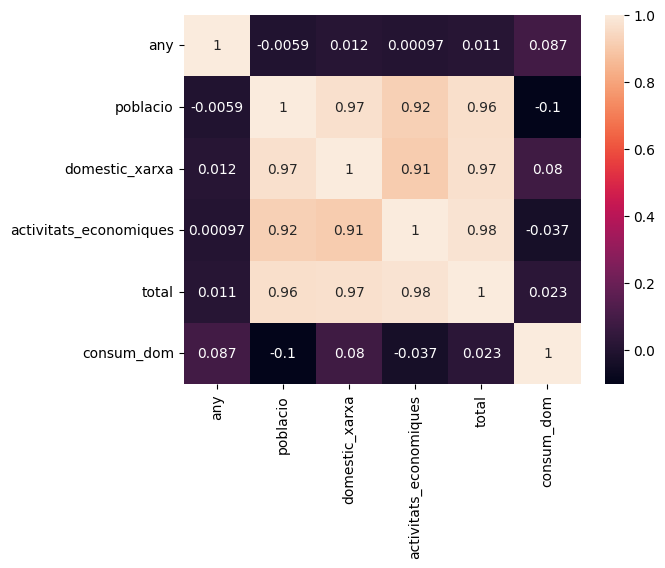

In [721]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Checking for correlations with the data as we have it at the moment:
cor = numericals.corr(method='spearman')
sns.heatmap(cor, annot=True)
plt.show

Water quantity in the dams of Catalonia Internal Basins
- As this dataframe may be too small for an in depth analysis, I will try to add more related data about
the state of the reservoirs of the Internal Basins of Catalonia based on the values of Water level in the reservoir, Reservoir volume and Percentage of the reservoir volume with respect to the reservoir capacity (aggregated data from the previous day).
- Public data from the government of spain (www.datos.gov.es)
- The idea is by adding more info, calculate the total water consumption per region and day from the first set of data. We could then group the second dataset by day, and optionally by season if relevant, and then join them based on date. This will allow seing how water consumption varies with respect to the state of the reservoirs on a daily basis.

In [722]:
#Uploading the info:
file1 = pd.read_csv("Data/embassaments.csv")

In [723]:
file1

,Dia,Estació,Nivell absolut (msnm),Percentatge volum embassat (%),Volum embassat (hm3)
0,19/08/2004,Embassament de Darnius Boadella (Darnius),151.89,64.9,39.67
1,07/01/2002,Embassament de Susqueda (Osor),309.39,28.9,67.27
2,02/08/2001,Embassament de Riudecanyes,208.79,33.5,1.78
3,27/12/2004,Embassament de Siurana (Cornudella de Montsant),482.78,82.1,10.03
4,31/05/2008,Embassament de Darnius Boadella (Darnius),141.71,29.3,17.88
...,...,...,...,...,...
80023,14/04/2024,Embassament de Riudecanyes,194.75,2.8,0.15
80024,14/04/2024,Embassament de Siurana (Cornudella de Montsant),453.26,2.8,0.34
80025,13/04/2024,Embassament de Sant Ponç (Clariana de Cardener),514.73,33.4,8.15
80026,13/04/2024,Embassament de Riudecanyes,194.75,2.8,0.15


In [724]:
#Importing url from the API "https://datos.gob.es/en/apidata" to get json info:
url1 = "https://analisi.transparenciacatalunya.cat/api/views/gn9e-3qhr/rows.json?accessType=DOWNLOAD"

In [725]:
#Checking the status:
response = requests.get(url1)
response.status_code

200

In [726]:
#Saving the json data into a variable:
data1 = response.json()

Metadata:

- Dia: Date on which the measure was taken
- Estació: Reservoir where the measurement was taken
- Nivell absolut (msnm): Water level (msnm) measured in the reservoir
- Percentatge volum embassat (%): Percentage of water volume in relation to the maximum capacity of the reservoir
- Volum embassat (hm3): Volume of water (hm3) to which the measured level corresponds

In [727]:
#Exploration of the data:
file1.Estació.value_counts()

Estació
Embassament de Darnius Boadella (Darnius)          8892
Embassament de Susqueda (Osor)                     8892
Embassament de Riudecanyes                         8892
Embassament de Siurana (Cornudella de Montsant)    8892
Embassament de Sau (Vilanova de Sau)               8892
Embassament de la Baells (Cercs)                   8892
Embassament de Foix (Castellet i la Gornal)        8892
Embassament de Sant Ponç (Clariana de Cardener)    8892
Embassament de la Llosa del Cavall (Navès)         8892
Name: count, dtype: int64

Relating regions with the Reservoirs:
- Alt Empordà (codi comarca: 2) - Embassament de Darnius Boadella
- Selva (codi comarca: 34) - Embassament de Susqueda
- Baix Camp (codi comarca: 8) - Embassament de Riudecanyes
- Priorat (codi comarca: 29) - Embassament de Siurana
- Osona (codi comarca: 24) - Embassament de Sau
- Berguedà (codi comarca: 14) - Embassament de la Baells
- Alt Penedès (codi comarca: 3) - Embassament de Foix
- Solsonès (codi comarca: 35) - Embassament de Sant Ponç i Embassament de la Llosa del Cavall

In [728]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80028 entries, 0 to 80027
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Dia                             80028 non-null  object 
 1   Estació                         80028 non-null  object 
 2   Nivell absolut (msnm)           79996 non-null  float64
 3   Percentatge volum embassat (%)  80028 non-null  float64
 4   Volum embassat (hm3)            80028 non-null  float64
dtypes: float64(3), object(2)
memory usage: 3.1+ MB


In [729]:
df.comarca.unique()

array(["ALT CAMP, L'", "ALT EMPORDÀ, L'", "ALT PENEDÈS, L'",
       "ALT URGELL, L'", "ALTA RIBAGORÇA, L'", "ANOIA, L'", 'BAGES, EL',
       'BAIX CAMP, EL', 'BAIX EBRE, EL', 'BAIX EMPORDÀ, EL',
       'BAIX LLOBREGAT, EL', 'BAIX PENEDÈS, EL', 'BARCELONÈS, EL',
       'BERGUEDÀ, EL', 'CERDANYA, LA', 'CONCA DE BARBERÀ, LA',
       'GARRAF, EL', 'GARRIGUES, LES', 'GARROTXA, LA', 'GIRONÈS, EL',
       'MARESME, EL', 'Moianès', 'MONTSIÀ, EL', 'NOGUERA, LA', 'OSONA',
       'PALLARS JUSSÀ, EL', 'PALLARS SOBIRÀ, EL', "PLA D'URGELL, EL",
       "PLA DE L'ESTANY, EL", 'PRIORAT, EL', "RIBERA D'EBRE, LA",
       'RIPOLLÈS, EL', 'SEGARRA, LA', 'SEGRIÀ, EL', 'SELVA, LA',
       'SOLSONÈS, EL', 'TARRAGONÈS, EL', 'TERRA ALTA', "URGELL, L'",
       "VAL D'ARAN, LA", 'VALLÈS OCCIDENTAL, EL', 'VALLÈS ORIENTAL, EL'],
      dtype=object)

In [730]:
#Defining some functions in order to match some data:

In [731]:
def matching_embassament(comarca):
    matching_dict = {
        "ALT EMPORDÀ, L'": 'Embassament de Darnius Boadella (Darnius)',
        'SELVA, LA': 'Embassament de Susqueda (Osor)',
        'BAIX CAMP, EL': 'Embassament de Riudecanyes',
        'PRIORAT, EL': 'Embassament de Siurana (Cornudella de Montsant)',
        'OSONA': 'Embassament de Sau (Vilanova de Sau)',
        'BERGUEDÀ, EL': 'Embassament de la Baells (Cercs)',
        "ALT PENEDÈS, L'": 'Embassament de Foix (Castellet i la Gornal)',
        'VAL D\'ARAN, LA': 'Embassament de Sant Ponç (Clariana de Cardener) i Embassament de la Llosa del Cavall (Navès)'
    }
    return matching_dict.get(comarca)



In [732]:
def matching_codi_comarca(comarca):
    matching_dict = {
        "ALT EMPORDÀ, L'": '2',
        'SELVA, LA': '34',
        'BAIX CAMP, EL': '8',
        'PRIORAT, EL': '29',
        'OSONA': '24',
        'BERGUEDÀ, EL': '14',
        "ALT PENEDÈS, L'": '3',
        'VAL D\'ARAN, LA': '42'
    }
    return matching_dict.get(comarca)

In [733]:
def matching_nom_comarca(codi_comarca):
    matching_dict = {
        '1': "ALT CAMP, L'",
        '2': "ALT EMPORDÀ, L'",
        '3': "ALT PENEDÈS, L'",
        '4': "ALT URGELL, L'",
        '5': "ALTA RIBAGORÇA, L'",
        '6': "ANOIA, L'",
        '7': 'BAGES, EL',
        '8': 'BAIX CAMP, EL',
        '9': 'BAIX EBRE, EL',
        '10': 'BAIX EMPORDÀ, EL',
        '11': 'BAIX LLOBREGAT, EL',
        '12': 'BAIX PENEDÈS, EL',
        '13': 'BARCELONÈS, EL',
        '14': 'BERGUEDÀ, EL',
        '15': 'CERDANYA, LA',
        '16': 'CONCA DE BARBERÀ, LA',
        '17': 'GARRAF, EL',
        '18': 'GARRIGUES, LES',
        '19': 'GARROTXA, LA',
        '20': 'GIRONÈS, EL',
        '21': 'MARESME, EL',
        '22': 'Moianès',
        '23': 'MONTSIÀ, EL',
        '24': 'NOGUERA, LA',
        '25': 'OSONA',
        '26': 'PALLARS JUSSÀ, EL',
        '27': "PALLARS SOBIRÀ, EL",
        '28': "PLA D'URGELL, EL",
        '29': 'PLA DE L\'ESTANY, EL',
        '30': 'PRIORAT, EL',
        '31': "RIBERA D'EBRE, LA",
        '32': 'RIPOLLÈS, EL',
        '33': 'SEGARRA, LA',
        '34': 'SEGRIÀ, EL',
        '35': 'SELVA, LA',
        '36': 'SOLSONÈS, EL',
        '37': 'TARRAGONÈS, EL',
        '38': "TERRA ALTA",
        '39': 'URGELL, L\'',
        '40': "VAL D'ARAN, LA",
        '41': 'VALLÈS OCCIDENTAL, EL',
        '42': 'VALLÈS ORIENTAL, EL'
    }
    return matching_dict.get(codi_comarca)


In [734]:
def matching_nom_estacio(estacio):
    matching_dict = {
        'Embassament de Darnius Boadella (Darnius)': "ALT EMPORDÀ, L'",
        'Embassament de Susqueda (Osor)': 'SELVA, LA',
        'Embassament de Riudecanyes': 'BAIX CAMP, EL',
        'Embassament de Siurana (Cornudella de Montsant)': 'PRIORAT, EL',
        'Embassament de Sau (Vilanova de Sau)': 'OSONA',
        'Embassament de la Baells (Cercs)': 'BERGUEDÀ, EL',
        'Embassament de Foix (Castellet i la Gornal)': "ALT PENEDÈS, L'",
        'Embassament de Sant Ponç (Clariana de Cardener) i Embassament de la Llosa del Cavall (Navès)': 'VAL D\'ARAN, LA'
    }
    return matching_dict.get(estacio)


In [735]:
#Setting the two dfs as:
df_consums = df #df_consum is the DataFrame with water consumption by region and day
df_embassaments = file1 #df_reservoirs is the DataFrame with the state of the reservoirs per day

In [736]:
# Adding a new column to df_consums with the names of matching reservoirs:
df_consums['Embassament'] = df_consums['comarca'].apply(matching_embassament)

In [737]:
# Converting column to datetime:
df_embassaments['Dia'] = pd.to_datetime(df_embassaments['Dia'])

C:\Users\Elsa\AppData\Local\Temp\ipykernel_12140\3938420333.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_embassaments['Dia'] = pd.to_datetime(df_embassaments['Dia'])


In [738]:
#Groupby and aggregation of total water consumption by year and region 
consum_comarca_any = df_consums.groupby(['any', 'codi_comarca']).agg({'consum_dom': 'sum'}).reset_index()

In [739]:
#Adding region code so later it's easier to merge datasets:
consum_comarca_any['comarca'] = consum_comarca_any['codi_comarca'].apply(matching_nom_comarca)

In [740]:
# Adding values from df_consums to consum_comarca_any:
consum_comarca_any = pd.merge(consum_comarca_any, df_consums[['codi_comarca', 'poblacio', 'domestic_xarxa', 'activitats_economiques']], on='codi_comarca', how='left')


In [741]:
#We group by day and add the volume impounded and the percentage of volume impounded:
estat_embassaments_dia = df_embassaments.groupby(['Dia', 'Estació']).agg({'Volum embassat (hm3)': 'sum', 'Percentatge volum embassat (%)': 'mean'}).reset_index()

In [742]:
#Converting column dia-year:
estat_embassaments_dia['any'] = estat_embassaments_dia['Dia'].dt.year

In [743]:
#Adding region column using matching_nom_comarca function:
estat_embassaments_dia['comarca'] = estat_embassaments_dia['Estació'].apply(matching_nom_estacio)

In [744]:
#Adding region code using matching_codi_comarca function:
estat_embassaments_dia['codi_comarca'] = estat_embassaments_dia['comarca'].apply(matching_codi_comarca)

In [745]:
consum_comarca_any.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   any                     5025 non-null   int32  
 1   codi_comarca            5025 non-null   object 
 2   consum_dom              5025 non-null   float64
 3   comarca                 5025 non-null   object 
 4   poblacio                5025 non-null   int32  
 5   domestic_xarxa          5025 non-null   int32  
 6   activitats_economiques  5025 non-null   int32  
dtypes: float64(1), int32(4), object(2)
memory usage: 196.4+ KB


In [746]:
estat_embassaments_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80028 entries, 0 to 80027
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Dia                             80028 non-null  datetime64[ns]
 1   Estació                         80028 non-null  object        
 2   Volum embassat (hm3)            80028 non-null  float64       
 3   Percentatge volum embassat (%)  80028 non-null  float64       
 4   any                             80028 non-null  int32         
 5   comarca                         62244 non-null  object        
 6   codi_comarca                    62244 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(3)
memory usage: 4.0+ MB


In [747]:
#Let's join the two DataFrames:
resultat_final = pd.merge(consum_comarca_any, estat_embassaments_dia, on=['any', 'codi_comarca'], how='inner')


In [748]:
resultat_final

,any,codi_comarca,consum_dom,comarca_x,poblacio,domestic_xarxa,activitats_economiques,Dia,Estació,Volum embassat (hm3),Percentatge volum embassat (%),comarca_y
0,2012,14,97.08,"BERGUEDÀ, EL",40279,1433782,1069281,2012-01-01,Embassament de la Baells (Cercs),102.35,93.5,"BERGUEDÀ, EL"
1,2012,14,97.08,"BERGUEDÀ, EL",40279,1433782,1069281,2012-01-02,Embassament de la Baells (Cercs),102.26,93.4,"BERGUEDÀ, EL"
2,2012,14,97.08,"BERGUEDÀ, EL",40279,1433782,1069281,2012-01-03,Embassament de la Baells (Cercs),102.18,93.4,"BERGUEDÀ, EL"
3,2012,14,97.08,"BERGUEDÀ, EL",40279,1433782,1069281,2012-01-04,Embassament de la Baells (Cercs),102.11,93.3,"BERGUEDÀ, EL"
4,2012,14,97.08,"BERGUEDÀ, EL",40279,1433782,1069281,2012-01-05,Embassament de la Baells (Cercs),102.05,93.3,"BERGUEDÀ, EL"
...,...,...,...,...,...,...,...,...,...,...,...,...
309381,2022,8,136.47,"BAIX CAMP, EL",193535,10540527,4394018,2022-12-27,Embassament de Riudecanyes,0.74,13.9,"BAIX CAMP, EL"
309382,2022,8,136.47,"BAIX CAMP, EL",193535,10540527,4394018,2022-12-28,Embassament de Riudecanyes,0.74,13.8,"BAIX CAMP, EL"
309383,2022,8,136.47,"BAIX CAMP, EL",193535,10540527,4394018,2022-12-29,Embassament de Riudecanyes,0.73,13.8,"BAIX CAMP, EL"
309384,2022,8,136.47,"BAIX CAMP, EL",193535,10540527,4394018,2022-12-30,Embassament de Riudecanyes,0.73,13.7,"BAIX CAMP, EL"


In [749]:
resultat_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309386 entries, 0 to 309385
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   any                             309386 non-null  int32         
 1   codi_comarca                    309386 non-null  object        
 2   consum_dom                      309386 non-null  float64       
 3   comarca_x                       309386 non-null  object        
 4   poblacio                        309386 non-null  int32         
 5   domestic_xarxa                  309386 non-null  int32         
 6   activitats_economiques          309386 non-null  int32         
 7   Dia                             309386 non-null  datetime64[ns]
 8   Estació                         309386 non-null  object        
 9   Volum embassat (hm3)            309386 non-null  float64       
 10  Percentatge volum embassat (%)  309386 non-null  float64

In [750]:
#resultat_final cleaning:
resultat = resultat_final.rename(columns={'comarca_x': 'comarca', 'comarca_y': 'comarca_embassament'})

In [751]:
resultat = resultat.drop(columns='comarca_embassament')

In [752]:
#Standarizing all names in english:
resultat = resultat.rename(columns={'any':'year','codi_comarca':'region_code','consum_dom':'domestic_consumption',
                                    'comarca':'region','poblacio':'population','domestic_xarxa':'domestic_network',
                                    'activitats_economiques':'economic_activities','Dia':'day',
                                    'Estació':'reservoir','Volum embassat (hm3)':'reservoir_vol_hm3',
                                    'Percentatge volum embassat (%)':'reservoir_vol_percent'})

In [753]:
column_order = ['day','year','region_code','region','population','domestic_consumption',
                'domestic_network','economic_activities','reservoir','reservoir_vol_hm3','reservoir_vol_percent']
data = resultat[column_order]

In [754]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309386 entries, 0 to 309385
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   day                    309386 non-null  datetime64[ns]
 1   year                   309386 non-null  int32         
 2   region_code            309386 non-null  object        
 3   region                 309386 non-null  object        
 4   population             309386 non-null  int32         
 5   domestic_consumption   309386 non-null  float64       
 6   domestic_network       309386 non-null  int32         
 7   economic_activities    309386 non-null  int32         
 8   reservoir              309386 non-null  object        
 9   reservoir_vol_hm3      309386 non-null  float64       
 10  reservoir_vol_percent  309386 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(4), object(3)
memory usage: 21.2+ MB


Final metadata:
- **day**: Date on which the measure was taken                   
- **year**: Year                            
- **region_code**: number of the region (comarca)                  
- **region**: name of the region                        
- **population**: Number of inhabitants of the region based on data from the Municipal Register               
- **domestic_consumption**: Household consumption of the network per person per day. It is calculated as follows: (Domestic network1000)/(Population365). Measured in liters/person/day         
- **domestic_network**: Volume consumed billed to households connected to the water supply network. Measured in cubic meters               
- **economic_activities**: Volume consumed and billed to industrial and service uses connected to the water supply network and to all users of their own sources. Measured in cubic meters            
- **reservoir**: Reservoir where the measurement was taken                      
- **reservoir_vol**: Volume of water (hm3) to which the measured level corresponds               
- **reservoir_vol_percent**: Percentage of water volume in relation to the maximum capacity of the reservoir  

In [755]:
numericals = data.select_dtypes(np.number)

<function matplotlib.pyplot.show(close=None, block=None)>

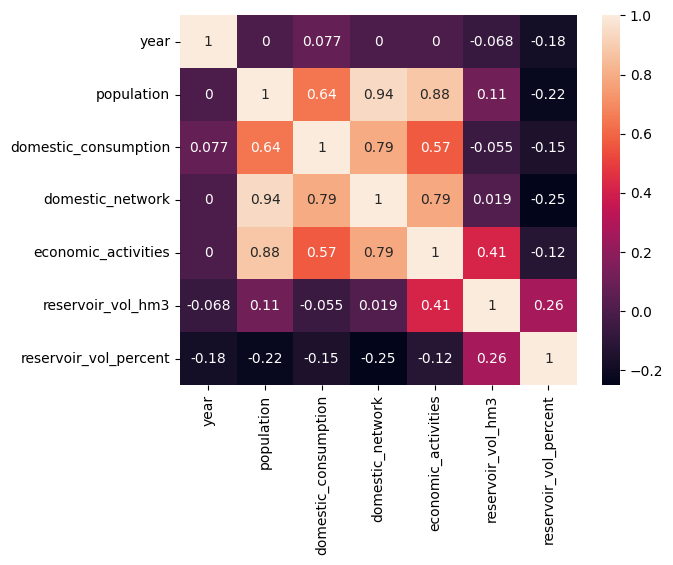

In [756]:
#Checking for correlations with the data:
cor = numericals.corr(method='spearman')
sns.heatmap(cor, annot=True)
plt.show

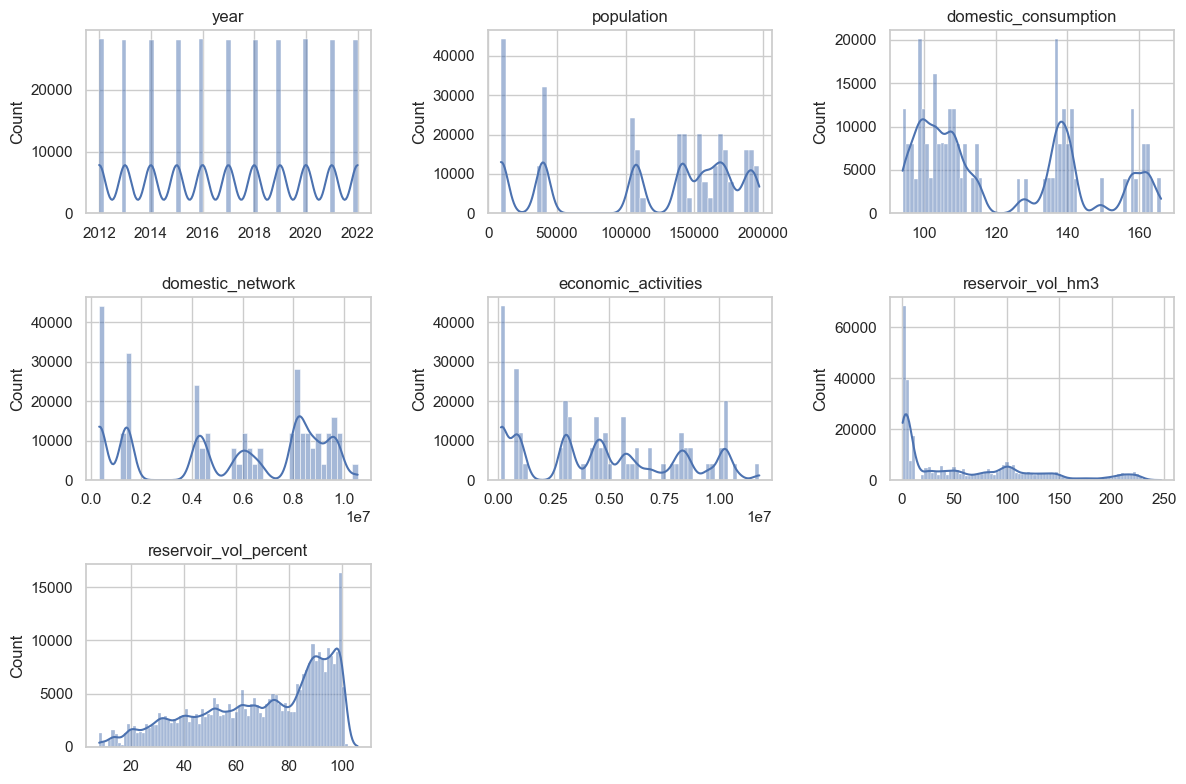

In [757]:
#Feature Engineering:
#Plotting distribution of numerical values:
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

plt.figure(figsize=(12, 8))

for i, column in enumerate(numericals.columns):
    plt.subplot(3, 3, i+1)  
    sns.histplot(numericals[column], kde=True)  
    plt.title(column)  
    plt.xlabel('')  

plt.tight_layout()
plt.show()



In [758]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

In [759]:
def sqrt_transfom_clean_(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

In [761]:
#Scaling numerical data so everything its within the same range (to follow normal distribution)
from sklearn.preprocessing import StandardScaler
optimusprime=StandardScaler().fit(numericals)
x_standarized = optimusprime.transform(numericals)

In [766]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numericals['population_normalized'] = scaler.fit_transform(numericals[['population']])

In [769]:
#Keeping only normalized variable
numericals.drop(columns=['population'], inplace=True)

In some variables there is a lack of data density: This may be due to a lack of sampling or data collection in some intervals.

In [ ]:
pd.Series(map(sqrt_transfom_clean_, data['domestic_consumption'])).hist()
plt.show()

In [776]:
# Use log transformation to replace the values of the column
numericals['domestic_consumption'] = list(map(sqrt_transfom_clean_, numericals['domestic_consumption']))
numericals['domestic_consumption'] = numericals['domestic_consumption'].fillna(np.mean(numericals['domestic_consumption']))

In [781]:
numericals['reservoir_vol_percent'] = np.log(numericals['reservoir_vol_percent'])

In [ ]:
pd.Series(map(log_transfom_clean_, data['reservoir_vol_percent'])).hist()
plt.show()

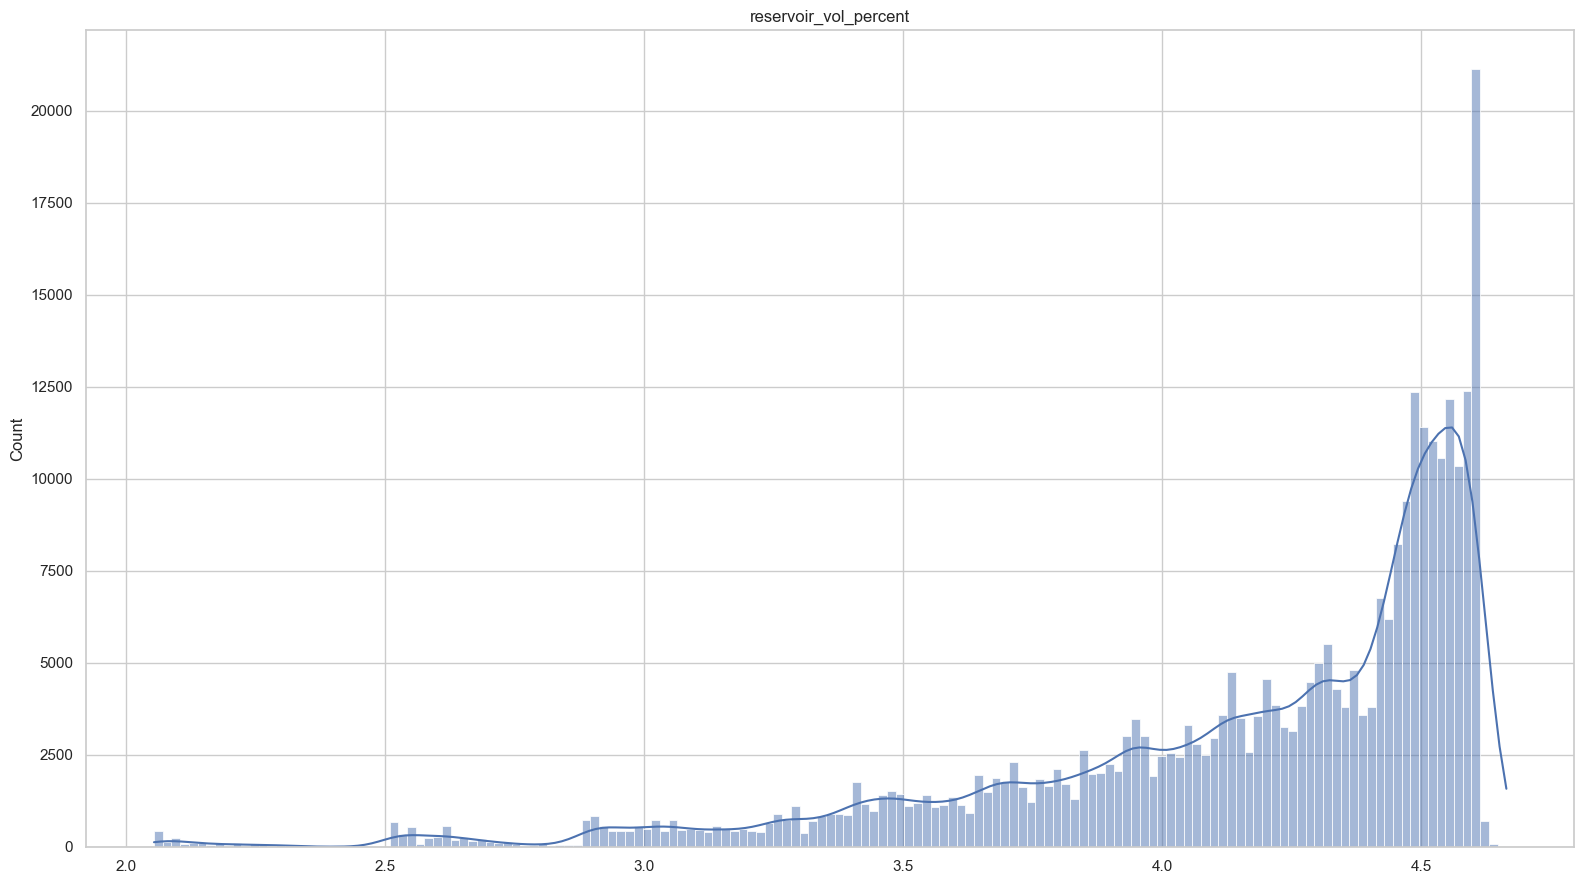

In [784]:
sns.histplot(numericals['reservoir_vol_percent'], kde=True)  
plt.title(column)  
plt.xlabel('')  

plt.tight_layout()
plt.show()

In [783]:
from sklearn.preprocessing import Normalizer #establish what type of normalization I want to do
transformer = Normalizer().fit(numericals) #the variable with which we are going to transform the data (the frame)
x_normalized=transformer.transform(numericals)
print(x_normalized)

[[1.12490097e-03 5.50872633e-06 8.01621649e-01 ... 5.72234661e-05
  2.53715567e-06 9.23659148e-08]
 [1.12490097e-03 5.50872633e-06 8.01621649e-01 ... 5.71731475e-05
  2.53655738e-06 9.23659148e-08]
 [1.12490097e-03 5.50872633e-06 8.01621649e-01 ... 5.71284198e-05
  2.53655738e-06 9.23659148e-08]
 ...
 [1.77062065e-04 1.02297017e-06 9.23010621e-01 ... 6.39244843e-08
  2.29836420e-07 8.57129015e-08]
 [1.77062065e-04 1.02297017e-06 9.23010621e-01 ... 6.39244843e-08
  2.29199560e-07 8.57129015e-08]
 [1.77062065e-04 1.02297017e-06 9.23010621e-01 ... 6.39244843e-08
  2.28558035e-07 8.57129015e-08]]


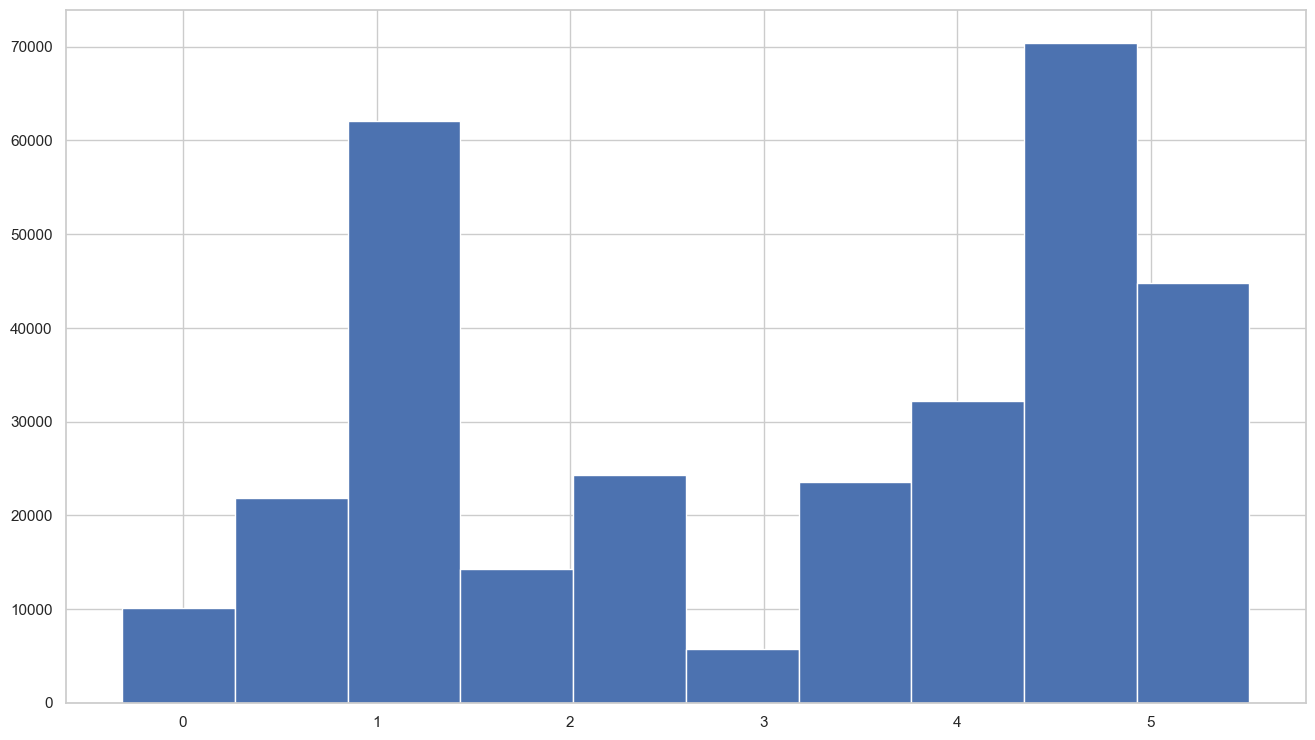

In [786]:
pd.Series(map(log_transfom_clean_, numericals['reservoir_vol_hm3'])).hist()
plt.show()

In [787]:
numericals['reservoir_vol_hm3'] = list(map(sqrt_transfom_clean_, numericals['reservoir_vol_hm3']))
numericals['reservoir_vol_hm3'] = numericals['reservoir_vol_hm3'].fillna(np.mean(numericals['reservoir_vol_hm3']))

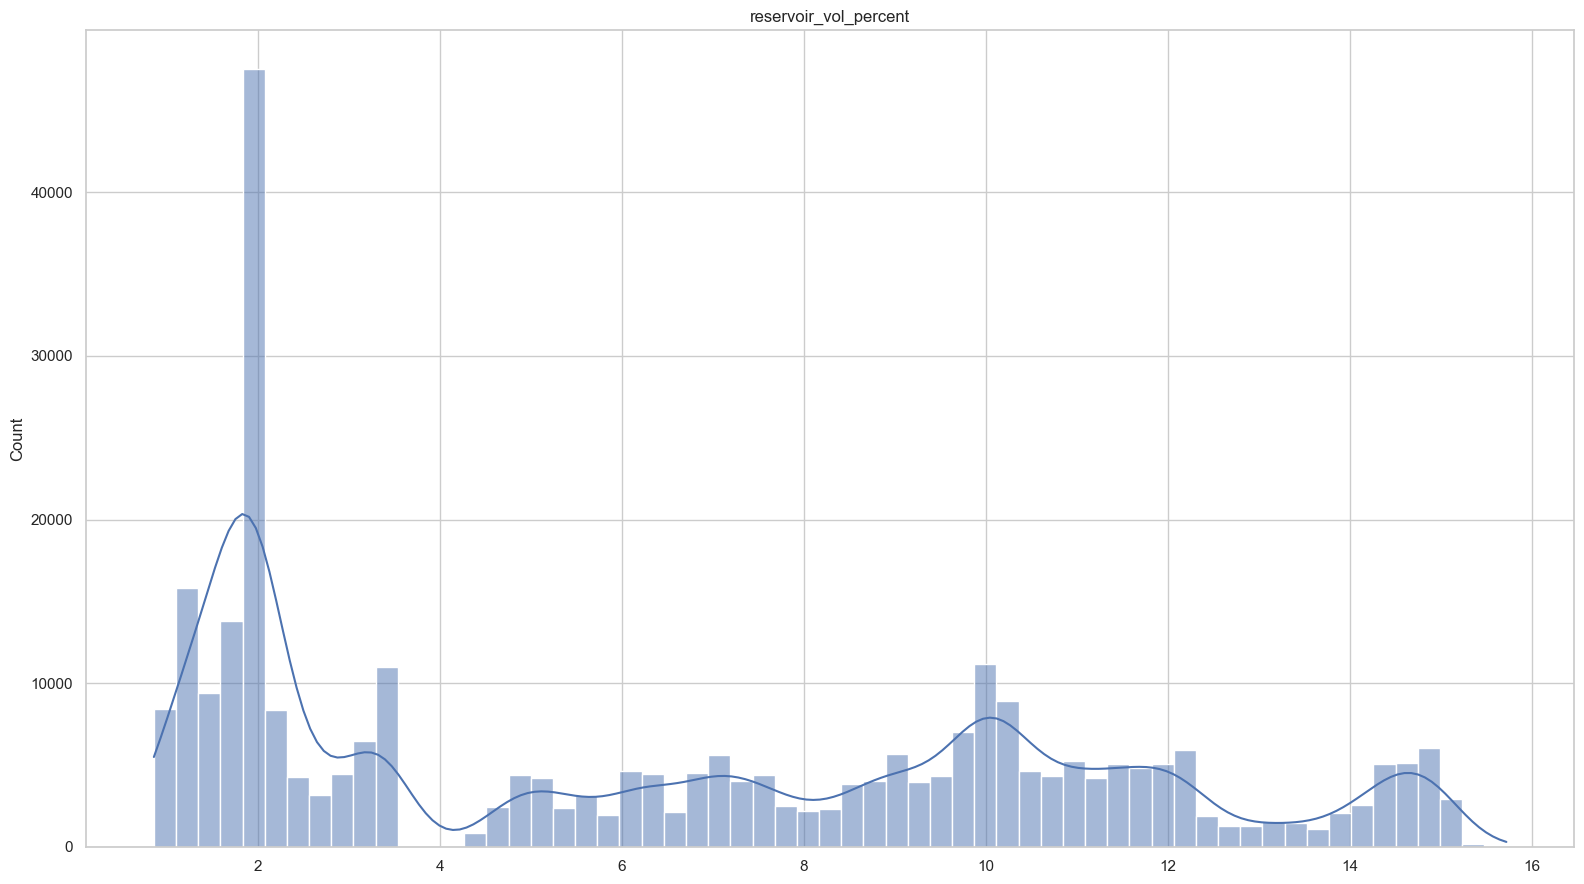

In [788]:
sns.histplot(numericals['reservoir_vol_hm3'], kde=True)  
plt.title(column)  
plt.xlabel('')  

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

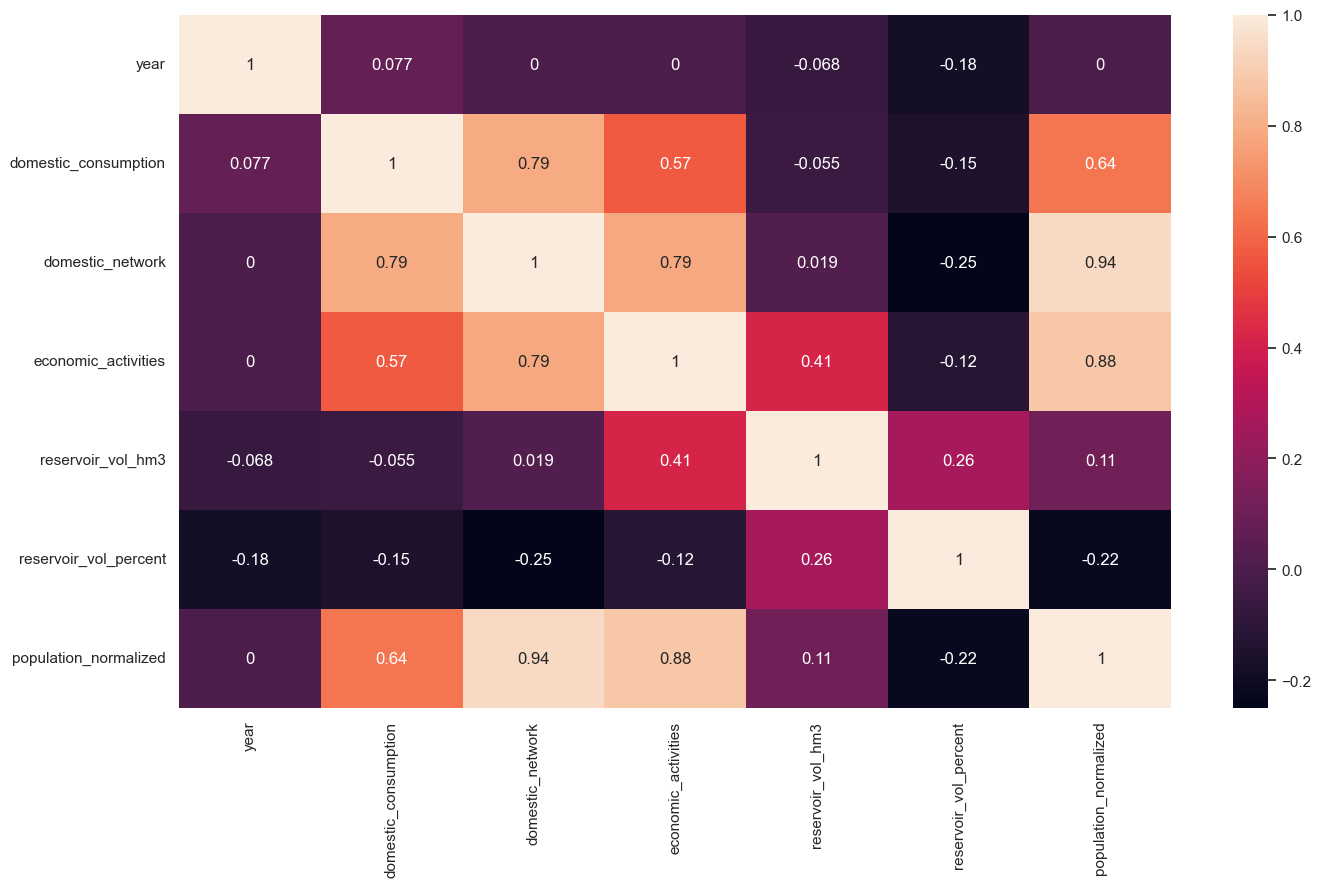

In [831]:
cor = numericals.corr(method='spearman')
sns.heatmap(cor, annot=True)
plt.show

In [802]:
#Let's try 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.metrics import r2_score

In [793]:
Y = numericals['reservoir_vol_hm3']
X = numericals[['domestic_consumption','population_normalized','domestic_network','economic_activities',
               'reservoir_vol_percent']]

In [794]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.8,random_state=42)

In [797]:
lm = linear_model.LinearRegression()
model=lm.fit(X_train, y_train)

In [798]:
predictions = lm.predict(X_test)

In [800]:
import math
mse = mean_squared_error(y_test, predictions)
print(mse)

rmse = math.sqrt(mse)
print(rmse)

8.975130518559418
2.9958522190788077


In [803]:
r2 = r2_score(y_test, predictions)
print(r2)

0.5491878760201379


In [804]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [805]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Interpretation
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Mean Squared Error: 8.975130518559418
Coefficients: [-1.12858884e+00 -1.96901104e+01  1.12144750e-06  1.60092954e-06
  3.08651600e+00]
Intercept: 3.607474371904045


In [ ]:
#Trying dropping a variable related to reservoirs 

In [809]:
Y = numericals['reservoir_vol_hm3']
X = numericals[['domestic_consumption','population_normalized','domestic_network','economic_activities',]]

In [810]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.8,random_state=42)

In [811]:
lm = linear_model.LinearRegression()
model=lm.fit(X_train, y_train)

In [812]:
predictions = lm.predict(X_test)

In [813]:
mse = mean_squared_error(y_test, predictions)
print(mse)

rmse = math.sqrt(mse)
print(rmse)

10.91180695252603
3.3033024312838855


In [814]:
r2 = r2_score(y_test, predictions)
print(r2)

0.4519104921589425


In [826]:
#Other test
Y = numericals['reservoir_vol_hm3']
X = numericals[['reservoir_vol_percent','domestic_consumption']]

In [827]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.8,random_state=42)

In [828]:
lm = linear_model.LinearRegression()
model=lm.fit(X_train, y_train)

In [829]:
mse = mean_squared_error(y_test, predictions)
print(mse)

rmse = math.sqrt(mse)
print(rmse)

10.91180695252603
3.3033024312838855


In [830]:
r2 = r2_score(y_test, predictions)
print(r2)

0.4519104921589425


In [ ]:
#Trying on un-processed data

In [832]:
Y = data['reservoir_vol_hm3']
X = data[['domestic_consumption','population','domestic_network','economic_activities',]]

In [833]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.8,random_state=42)

In [834]:
lm = linear_model.LinearRegression()
model=lm.fit(X_train, y_train)

In [835]:
mse = mean_squared_error(y_test, predictions)
print(mse)

rmse = math.sqrt(mse)
print(rmse)

7156.554350113016
84.59642043321347


In [836]:
r2 = r2_score(y_test, predictions)
print(r2)

-0.634408120353195


In [ ]:
#Lets apply the "best" model so far
Y = numericals['reservoir_vol_hm3']
X = numericals[['domestic_consumption','population_normalized','domestic_network','economic_activities',
               'reservoir_vol_percent']]

In [838]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [841]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X)

model = sm.OLS(Y,X_train_sm).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      reservoir_vol_hm3   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                 8.835e+04
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        02:10:32   Log-Likelihood:            -1.6182e+06
No. Observations:              309386   AIC:                         3.236e+06
Df Residuals:                  309381   BIC:                         3.236e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   99.2006 

In [842]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
print("R2 value is = ",round(lm.score(X_train,y_train),2))

R2 value is =  0.53


In [843]:
predictions=lm.predict(X_test)
predictions

array([21.02425255, 83.14816453, 34.08384592, ..., 28.36965925,
       14.50909094, 45.24877525])